<a href="https://colab.research.google.com/github/vipulgote1999/-10daysofMLChallenge/blob/master/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

here uplode ur own token from kaggle or seach on google 
otherwise follow this link

https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vipulgote4","key":"2bd407fe9bd5da667508921b7df79c40"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p /root/.kaggle
!cp /content/kaggle.json /root/.kaggle

In [0]:
#!kaggle datasets list

In [124]:
! kaggle competitions download -c expedia-personalized-sort

randomBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
basicPythonBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
data.zip: Skipping, found more recently modified local copy (use --force to force download)
testOrderBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)


we want to unzip data so simply use with !unzip and followed by path

In [125]:
!unzip /content/data.zip

Archive:  /content/data.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: train.csv               


imported necessary lib 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#imported training data and test data into dataframe using pandas

In [128]:
train_df=pd.read_csv('/content/train.csv')
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [129]:
train_df.keys()

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [0]:
#test_Df=pd.read_csv('/content/train.csv')

In [131]:
train_df.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

In [132]:
train_df.describe(include='all')

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,9.917530e+06,9917530,9.917530e+06,9.917530e+06,505297.000000,507612.000000,9.917530e+06,9.917530e+06,9.917530e+06,9.902900e+06,9.917530e+06,9.917530e+06,7.739150e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,635564.000000,6.701069e+06,9.917530e+06,235806.000000,254433.000000,184907.00000,4.040633e+06,4.251538e+06,1.109847e+06,3.059273e+06,3.292221e+06,944007.000000,620099.000000,692471.000000,2.642130e+05,4.444294e+06,4.720833e+06,1.681006e+06,482487.000000,524145.000000,1.933120e+05,631077.000000,713175.000000,277838.000000,3.819043e+06,3.960388e+06,1.225707e+06,9.917530e+06,276592.000000,9.917530e+06
unique,NaN,394534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-04 17:39:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.329138e+05,NaN,9.966175e+00,1.752954e+02,3.374634,176.588512,1.739055e+02,7.008015e+04,3.181534e+00,3.777702e+00,6.343042e-01,2.875978e+00,1.304190e-01,4.316834e+00,1.686601e+01,2.417825e+02,2.157616e-01,1.405615e+04,2.390011e+00,3.762379e+01,1.972597e+00,3.487331e-01,1.110800e+00,5.002563e-01,-24.302829,1.307018e+03,2.964097e-01,0.478809,0.030197,244.94037,4.463162e-02,3.956545e-02,2.008163e+01,1.756103e-02,5.745058e-02,26.979212,-0.016810,0.095923,1.557236e+02,2.272509e-02,5.185907e-02,2.838247e+01,0.128975,0.075651,2.301390e+01,0.147061,0.082259,20.141888,-6.072490e-02,9.889435e-03,2.321000e+01,4.473614e-02,386.530099,2.788930e-02
std,1.922876e+05,NaN,7.657325e+00,6.590955e+01,0.692218,108.434842,6.834768e+01,4.061177e+04,1.050191e+00,1.050806e+00,4.816248e-01,1.532092e+00,1.595145e-01,1.836241e+00,1.042769e+01,1.434181e+04,4.113497e-01,8.115132e+03,2.066758e+00,5.210799e+01,8.590720e-01,7.297288e-01,4.241494e-01,5.000000e-01,15.808004,2.030283e+03,4.566739e-01,0.641991,0.227349,1159.05506,4.481685e-01,2.344546e-01,1.455845e+03,4.578021e-01,2.946643e-01,1023.385701,0.577023,0.336243,5.060417e+03,5.213494e-01,2.682153e-01,1.190736e+03,0.560217,0.302058,2.560429e+03,0.578748,0.316165,136.217976,4.692456e-01,2.031648e-01,9.462088e+02,2.067240e-01,801.073164,1.646557e-01
min,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.00000,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,

# **total no of booking_bool values which are here labels**

In [133]:
int(list(train_df['booking_bool']).count(0))+int(list(train_df['booking_bool']).count(1))

9917530

# **hence here are total no of clusters are 2 as seen in booking_bool column**

In [134]:
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


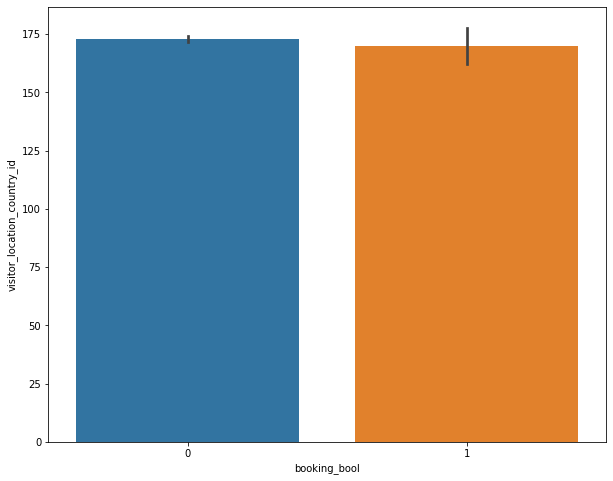

In [135]:
plt.figure(figsize=(10,8))
sns.barplot(x='booking_bool',y='visitor_location_country_id',data=train_df[:10000])

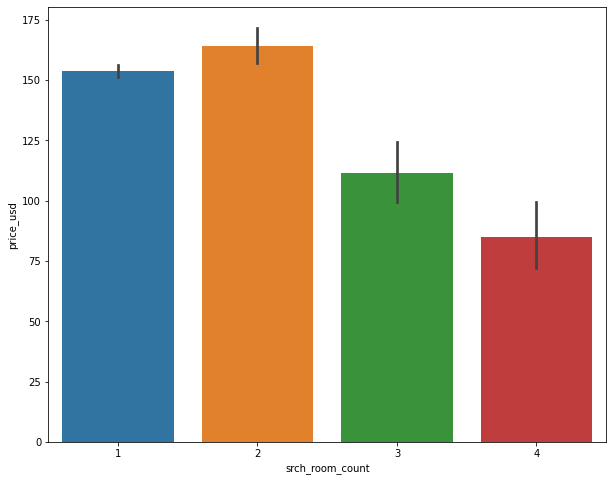

In [136]:
plt.figure(figsize=(10,8))
sns.barplot(y='price_usd',x='srch_room_count',data=train_df[:10000])	

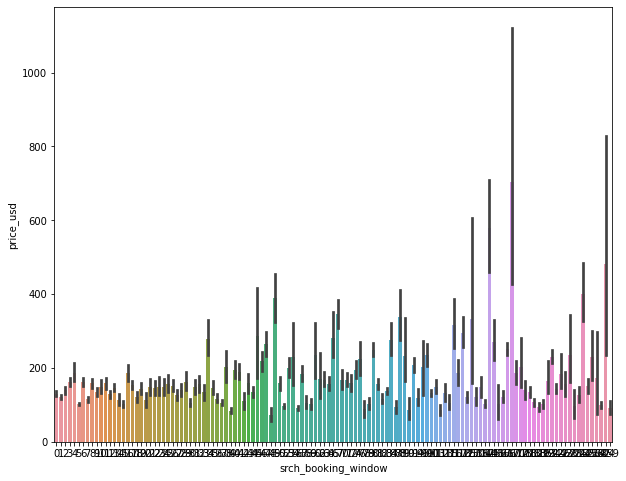

In [137]:
plt.figure(figsize=(10,8))
sns.barplot(y='price_usd',x='srch_booking_window',data=train_df[:10000])	

price_usd	srch_booking_window	srch_saturday_night_bool

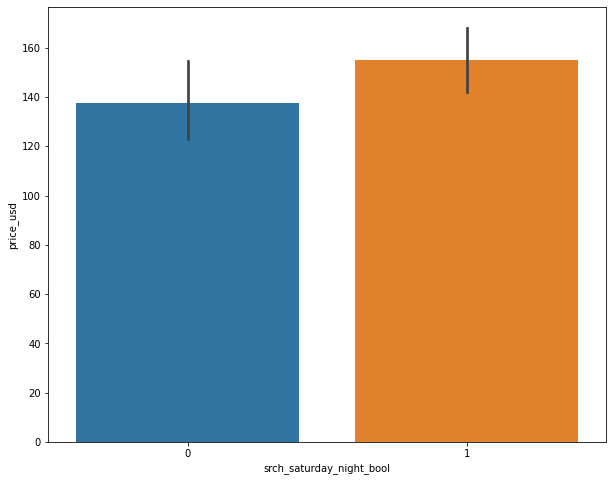

In [138]:
plt.figure(figsize=(10,8))
sns.barplot(y='price_usd',x='srch_saturday_night_bool',data=train_df[:500])	

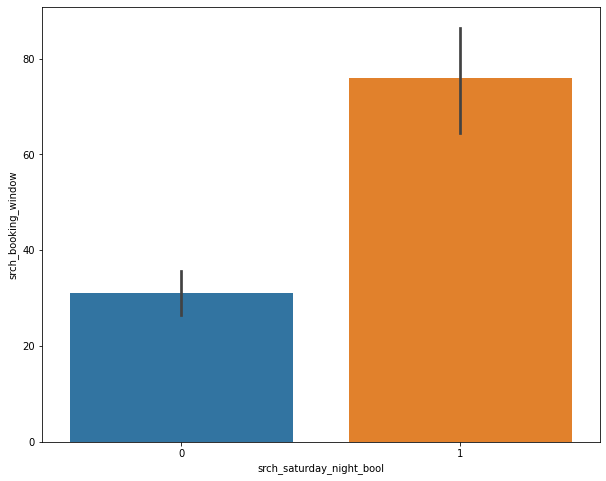

In [139]:
plt.figure(figsize=(10,8))
sns.barplot(y='srch_booking_window',x='srch_saturday_night_bool',data=train_df[:500])	

In [140]:
train_df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [0]:
date_time=train_df.pop('date_time')

In [0]:
features = StandardScaler().fit_transform(train_df[:10000][:-2].values)

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features_mean_imputed = mean_imputer.fit_transform(features)

In [0]:
pca = PCA(n_components=0.90, whiten=True)
features_pca = pca.fit_transform(features_mean_imputed)

In [146]:
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 53
Reduced number of features: 28


In [147]:
temp=pd.DataFrame(features_pca)
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.641848,-0.249737,0.313938,1.208389,-0.024450,-0.407805,-0.408368,-0.536739,1.191115,-0.860356,-0.951964,1.439511,-1.784644,-1.218112,-0.094223,1.142003,0.805461,-1.427081,0.479249,1.283221,0.497453,0.752217,0.913251,-1.681271,0.439350,0.698765,0.176043,0.342365
1,-0.457599,0.077378,0.825097,1.079663,0.154529,-0.712864,-0.698786,-0.171486,0.976853,-0.632371,-0.949408,1.787831,-1.829053,-1.157465,0.178465,1.629999,0.448510,-0.693555,-0.341432,1.484656,-3.076668,0.392507,1.080751,-2.206051,3.998477,0.296883,-1.305292,0.570731
2,-0.611596,0.103515,0.672112,1.149321,0.010692,-0.690126,-0.451382,-0.268907,0.678644,-0.566657,-1.141229,1.082508,-1.857899,-1.007399,0.102122,1.327107,0.588773,-1.093033,-0.090467,1.745942,0.724648,1.065031,1.104749,-1.136575,0.417804,0.430774,-0.084017,0.411809
3,-0.328606,-0.120820,1.413009,1.310671,-0.166922,-1.191999,-0.937035,-0.163584,2.780348,0.626028,-0.461109,1.577314,-1.957586,-0.791131,0.892026,1.123569,-2.791452,-0.746007,0.940166,3.510939,-3.347995,0.974957,3.349665,0.462413,3.679000,-2.823305,1.228865,1.074962
4,-0.295321,0.361076,0.460905,1.243325,0.144080,-0.799060,-0.241494,-0.696080,0.079050,-0.592895,-1.509264,0.513103,-2.294660,0.205920,0.514395,1.148009,0.658587,-1.357785,0.597930,0.796727,0.498021,0.660017,0.546626,-2.195448,0.605573,0.728131,0.061453,0.373216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-1.813342,-0.634321,-0.966802,-0.240070,0.148318,0.201831,1.994589,0.759432,0.336192,-0.130713,1.123218,-0.594521,-0.923601,0.018234,-0.067775,-0.464612,-0.552952,1.277123,0.750249,-0.415209,-0.460204,-0.087771,-0.003534,-0.320284,-0.309829,-0.790372,-0.815886,0.469935
9994,-1.715344,-1.117554,-1.552846,0.012104,0.086407,0.282697,2.260667,0.084528,0.744732,0.491247,1.462397,0.104213,-0.208371,0.505712,-0.015785,-0.755064,-0.539209,1.773705,-0.872242,0.794864,0.161950,0.433503,0.215651,1.277981,-0.133268,-0.970239,-0.530734,0.851526
9995,-1.287305,0.097009,-0.042463,-0.593172,0.532302,-0.277652,2.219672,0.827667,0.040009,0.022886,0.686381,-1.087391,-1.058543,-0.398528,-0.005471,-0.677519,-0.706258,1.515946,-0.411797,-0.210712,-0.127057,-0.169120,0.120581,-0.141068,-0.052237,-0.253275,-0.382497,0.558153
9996,-1.435540,-0.141913,-0.429317,-0.458548,0.412910,-0.094596,2.182175,0.927733,-0.172580,-0.009188,0.808756,-0.900988,-1.059274,-0.064688,0.136324,-0.538876,-0.733015,1.300657,0.074160,-0.620077,-0.270632,-0.325802,0.125190,-0.585689,0.058534,0.262845,0.013014,0.491355


In [148]:
train_df.loc[train_df['prop_id'] == 104517]

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
746,63,14,100,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.30,15,69.87,1,8192,4,25,3,0,1,0,NaN,1937.85,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1255,90,14,100,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,6,97.49,1,8192,2,44,1,0,1,1,NaN,1208.63,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2041,133,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,29,206.00,1,8192,3,99,1,0,1,1,NaN,397.74,1,NaN,NaN,NaN,-1.0,0.0,2.0,-1.0,0.0,2.0,NaN,NaN,NaN,-1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2309,148,10,4,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,33,127.71,1,8192,4,227,1,0,1,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3152,203,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,6,186.00,1,8192,3,6,2,0,1,0,NaN,222.13,0,NaN,NaN,NaN,1.0,0.0,14.0,0.0,0.0,20.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,14.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908584,664974,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,8,107.00,1,8192,3,30,2,0,1,1,NaN,876.42,1,NaN,NaN,NaN,1.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,NaN,0
9911528,665178,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,8,81.00,1,8192,1,73,2,1,1,0,NaN,1324.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9915868,665454,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.31,14,59.00,1,8192,6,33,2,0,1,0,NaN,382.59,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
9916580,665512,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,16,71.00,1,8192,2,59,2,0,1,0,NaN,257.65,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [0]:
train_df['date_time']=pd.Series(date_time)

In [0]:

df = train_df.loc[train_df['prop_id'] == 104517]

df = df.loc[df['visitor_location_country_id'] == 219]

df = df.loc[df['srch_room_count'] == 1]

df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

In [151]:
df.describe()

,price_usd,srch_booking_window,srch_saturday_night_bool
count,3049.000000,3049.000000,3049.000000
mean,112.939023,37.082650,0.524434
std,113.374049,46.160272,0.499485
min,0.120000,0.000000,0.000000
25%,67.000000,6.000000,0.000000
50%,100.000000,20.000000,1.000000
75%,141.000000,48.000000,1.000000
max,5584.000000,292.000000,1.000000


In [0]:
#date=pd.to_datetime(train_df['date_time'])
#train_df['date']=pd.Series(date)

In [0]:
#train_df.pop('date_time')

In [0]:
#sns.barplot(y='booking_bool',x='date',data=train_df[:5000])

In [155]:
df = df.loc[df['price_usd'] < 5584]
df['price_usd'].describe()

count    3048.000000
mean      111.144055
std        55.055161
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max       536.000000
Name: price_usd, dtype: float64

In [156]:
print(df['date_time'].min())
print(df['date_time'].max())

2012-11-01 02:48:30
2013-06-30 22:50:21


In [157]:
df['date_time'].describe()

df['date_time'] = pd.to_datetime(df['date_time'])

df.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2041,2013-03-14 11:27:28,206.0,99,1
3152,2013-01-03 20:48:24,186.0,6,0
5166,2013-01-19 16:51:27,61.0,1,0
10135,2013-01-26 11:34:23,72.0,116,0
10560,2013-04-29 09:39:50,246.0,245,0


Text(0.5, 1.0, 'Time series of room price by date of search')

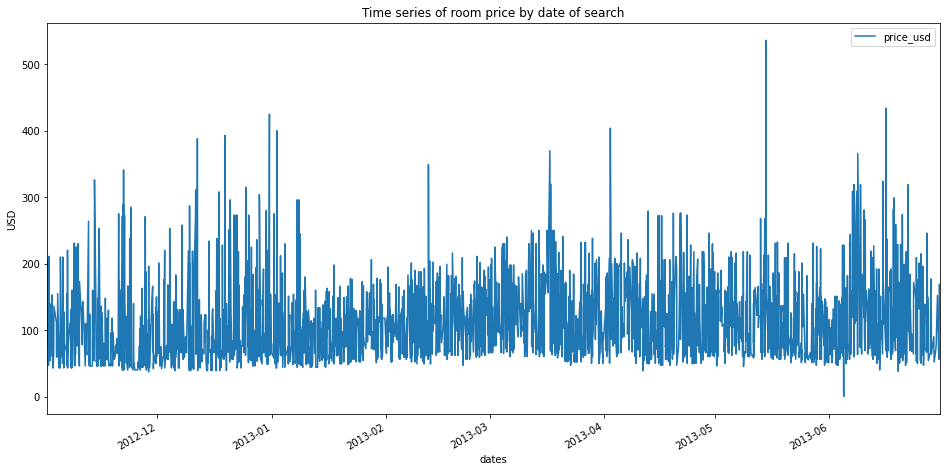

In [158]:
df.plot(x = 'date_time', 
        y = 'price_usd', 
        figsize = (16, 8))

plt.xlabel('dates')
plt.ylabel('USD')
plt.title('Time series of room price by date of search')

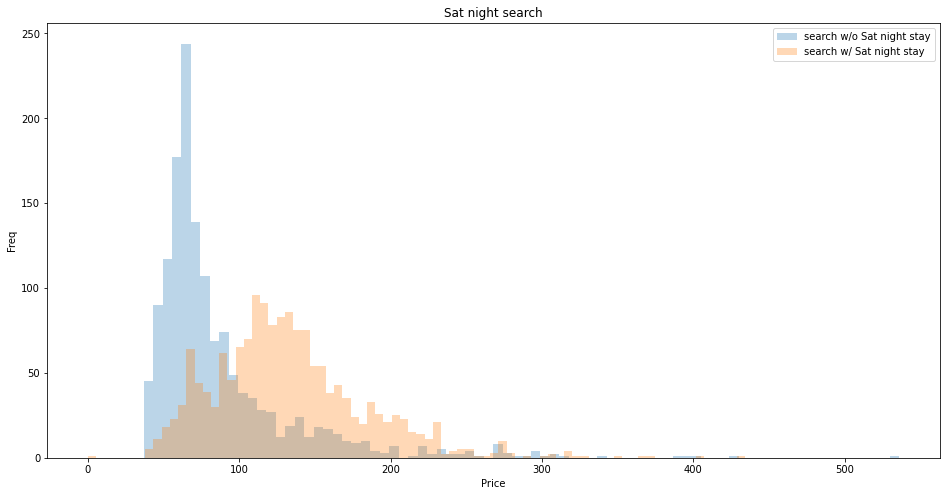

In [159]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

plt.figure(figsize = (16, 8))

plt.hist(a, bins = 80, 
         alpha = 0.3, 
         label = 'search w/o Sat night stay')

plt.hist(b, bins = 80, 
         alpha = 0.3, 
         label = 'search w/ Sat night stay')

plt.xlabel('Price')
plt.ylabel('Freq')
plt.legend()
plt.title('Sat night search')
plt.plot();

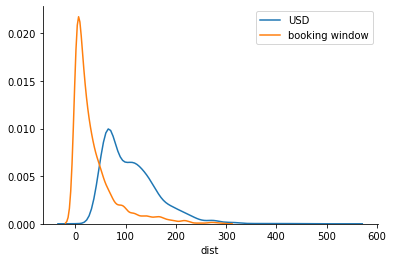

In [160]:

sns.distplot(df['price_usd'], 
                 hist = False, label = 'USD')

sns.distplot(df['srch_booking_window'], 
                  hist = False, label = 'booking window')

plt.xlabel('dist')
sns.despine()

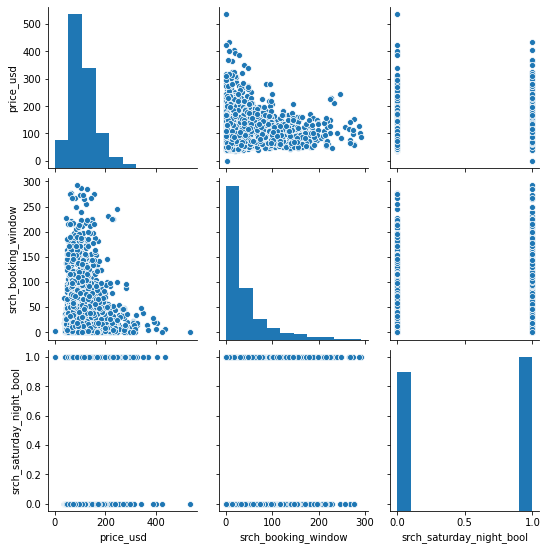

In [161]:
sns.pairplot(df)

In [0]:
df = df.sort_values('date_time')
df['date_time_int'] = df.date_time.astype(np.int64)

In [163]:
df

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool,date_time_int
3945840,2012-11-01 02:48:30,84.0,19,0,1351738110000000000
63387,2012-11-01 03:06:43,78.0,16,1,1351739203000000000
3352426,2012-11-01 09:04:18,114.0,56,1,1351760658000000000
5257418,2012-11-01 09:11:03,76.0,56,1,1351761063000000000
7091061,2012-11-01 10:15:25,128.0,0,1,1351764925000000000
...,...,...,...,...,...
2792991,2013-06-30 07:03:56,152.0,11,1,1372575836000000000
9363497,2013-06-30 15:42:32,56.0,172,1,1372606952000000000
143486,2013-06-30 16:43:40,68.0,8,0,1372610620000000000
2478763,2013-06-30 20:07:12,169.0,27,1,1372622832000000000


In [0]:
from sklearn.cluster import KMeans
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 50)

kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

In [165]:
kmeans,scores

([KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),


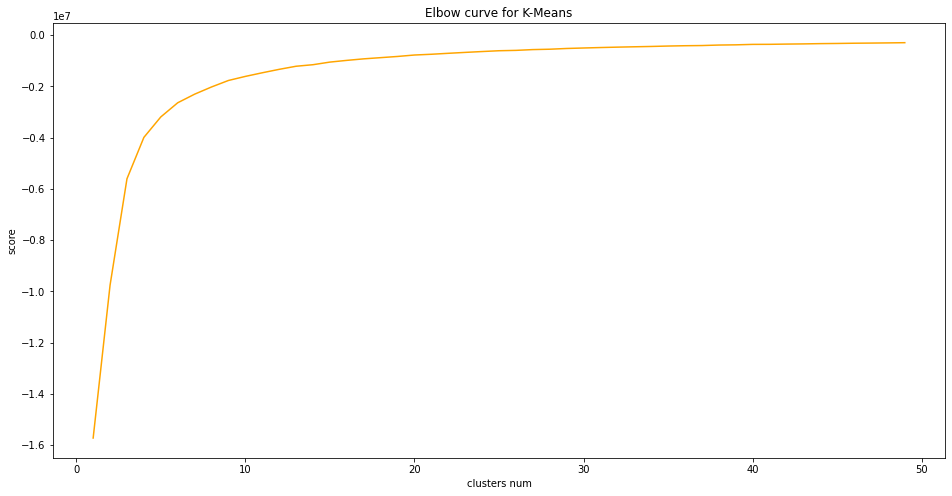

In [166]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(n_cluster, scores, color = 'orange')

plt.xlabel('clusters num')
plt.ylabel('score')
plt.title('Elbow curve for K-Means')
plt.show();

In [0]:
test = pd.read_csv('/content/test.csv')

In [0]:
km = KMeans(n_clusters = 20).fit(data)

In [0]:
X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop = True)
s=km.predict(X)

In [170]:
s

array([ 6,  6,  3, ...,  6, 13, 15], dtype=int32)

In [171]:
df['date_time'].values.shape

(3048,)

In [0]:
new_df=pd.DataFrame()
new_df['date_time']=pd.Series(df['date_time'].values)
new_df['price in usd']=pd.Series(s)

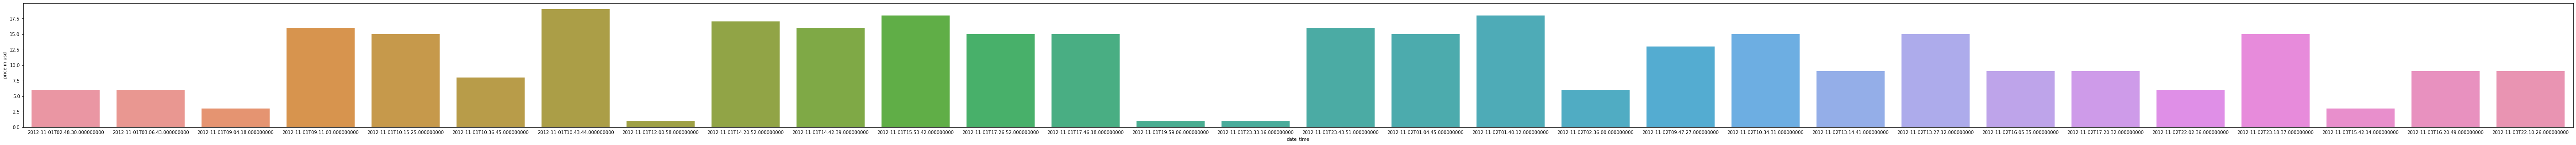

In [173]:
plt.figure(figsize=(100,5))
sns.barplot(x='date_time',y='price in usd',data=new_df[:30])